In [1]:
from keras.models import load_model

In [4]:
model = load_model("dnn_friend_model.h5")

In [7]:
import cv2
import numpy as np
def preprocess_image (image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (250,250))
    flattened_image = resized_image.flatten().reshape(1,-1)
    return flattened_image / 255.0

def make_prediction (image_path):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction)
    return predicted_class


In [8]:
test_folder = "E:/goraya"
import os

for file_name in os.listdir(test_folder):
    image_path = os.path.join(test_folder, file_name)
    
    if os.path.isfile(image_path):
        predicted_class = make_prediction(image_path)
        print(f"Image: {file_name} | Predicted Class: {predicted_class}")


1/1 [==============================] - 0s 115ms/step
Image: PXL_20230727_120049731.MP.jpg | Predicted Class: 0


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

1/1 [==============================] - 0s 30ms/step


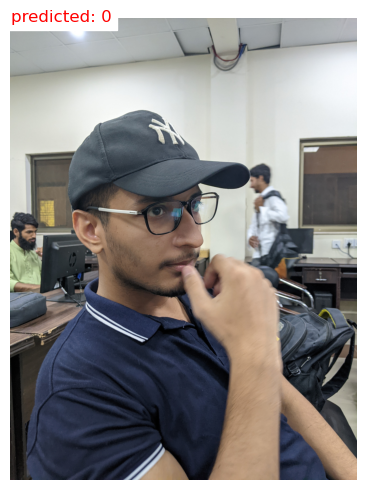

In [10]:
figure_width = 8
figure_height = 6

plt.figure(figsize = (figure_width, figure_height))

for file_name in os.listdir(test_folder):
    image_path = os.path.join(test_folder, file_name)
    
    if os.path.isfile(image_path):
        predicted_class = make_prediction(image_path)
        
        img = mpimg.imread(image_path)
        
        plt.imshow(img, cmap = "gray")
        plt.axis("off")
        
        plt.text(10, 30, f"predicted: {predicted_class}", fontsize = 12, color = "red", backgroundcolor = "white")
        
        plt.show()